In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import re

In [2]:
teamsURL='https://www.espn.com/soccer/teams/_/league/FIFA.WORLD/fifa-world-cup'
playersURL='https://www.fifaindex.com/players/fifa18/?name='

In [3]:
def scrape_teams(teamsURL):
    teamsList=[]
    links=[]
    reqURL = requests.get(teamsURL)
    soup = BeautifulSoup(reqURL.content, "html.parser")
    for team in soup.findAll("a", class_="AnchorLink"):
        
        for teamName in team.findAll("h2", class_="di clr-gray-01 h5"):      
            teamsList.append(teamName.text)

        if team.text=='Squad':
            link=re.findall(r'href="([^"]*/)', str(team))      
            links.append("https://www.espn.com"+link[0]+'league/FIFA.WORLD')
    
    return list(zip(teamsList,links))

In [4]:
def scrape_squads(teamURLlist):
    squadDict={}
  
    for i,x in enumerate(teamURLlist):
        
        urlTeam=x[1]
        reqURL = requests.get(urlTeam)  
        soup = BeautifulSoup(reqURL.content, "html.parser")
        players=[]

    # store players from team into a squad 
        for player in soup.findAll(style="min-width:140px"):
            players.append(re.sub(r'[0-9]+', '', player.text))
            squadDict[teamURLlist[i][0]]=players

    return squadDict   


squad_dict=scrape_squads(scrape_teams(teamsURL))

In [5]:
print(squad_dict['Germany'])
# print(squad_dict)

['Name', 'Manuel Neuer', 'Kevin Trapp', 'Marc-André ter Stegen', 'Name', 'Marvin Plattenhardt', 'Mats Hummels', 'Niklas Süle', 'Antonio Rüdiger', 'Jérôme Boateng', 'Jonas Hector', 'Matthias Ginter', 'Sami Khedira', 'Julian Draxler', 'Toni Kroos', 'Mesut Özil', 'Thomas Müller', 'Leon Goretzka', 'Joshua Kimmich', 'Sebastian Rudy', 'Julian Brandt', 'Ilkay Gündogan', 'Timo Werner', 'Marco Reus', 'Mario Gómez']


In [6]:
def scrape_player_links(playerVals):  
    
    playerName=[]
    playerLink=[]
    for players in playerVals:
        try:           
            req = requests.get(playersURL+players+'&order=desc')
            soup = BeautifulSoup(req.content, "html.parser")
            for player in soup.find(class_="player"):
                    link=re.findall(r'href="([^"]*/)', str(player))
                    if players not in playerName:
                        playerName.append(players)
                        playerLink.append('https://www.fifaindex.com'+str(link[0]))
        except:
            link="No link" 
            playerName.append(players)
            playerLink.append(link)          
            pass
    return (list(zip(playerName,playerLink)))

In [7]:
for keys,values in squad_dict.items():
    squad_dict[keys]=scrape_player_links(values)

In [8]:
squad_dict['Germany']

[('Name', 'https://www.fifaindex.com/player/204383/barry-mcnamee/fifa18/'),
 ('Manuel Neuer',
  'https://www.fifaindex.com/player/167495/manuel-neuer/fifa18/'),
 ('Kevin Trapp',
  'https://www.fifaindex.com/player/188943/kevin-trapp/fifa18/'),
 ('Marc-André ter Stegen',
  'https://www.fifaindex.com/player/192448/marc-andr%C3%A9-ter-stegen/fifa18/'),
 ('Marvin Plattenhardt',
  'https://www.fifaindex.com/player/192557/marvin-plattenhardt/fifa18/'),
 ('Mats Hummels',
  'https://www.fifaindex.com/player/178603/mats-hummels/fifa18/'),
 ('Niklas Süle',
  'https://www.fifaindex.com/player/212190/niklas-s%C3%BCle/fifa18/'),
 ('Antonio Rüdiger',
  'https://www.fifaindex.com/player/205452/antonio-r%C3%BCdiger/fifa18/'),
 ('Jérôme Boateng',
  'https://www.fifaindex.com/player/183907/j%C3%A9r%C3%B4me-boateng/fifa18/'),
 ('Jonas Hector',
  'https://www.fifaindex.com/player/208334/jonas-hector/fifa18/'),
 ('Matthias Ginter',
  'https://www.fifaindex.com/player/207862/matthias-ginter/fifa18/'),
 ('Sa

In [10]:
statistics=['Country','Height','Weight','Preferred Foot','Birth Date','Age','Preferred Positions','Value','Value','Value','Wage','Wage','Wage','Joined Club','Ball Control','Dribbling','Marking','Slide Tackle','Stand Tackle','Aggression','Reactions','Att. Position','Interceptions','Vision','Composure','Crossing','Short Pass','Long Pass','Acceleration','Stamina','Strength','Balance','Sprint Speed','Agility','Jumping','Heading','Shot Power','Finishing','Long Shots','Curve','FK Acc.','Penalties','Volleys','GK Positioning','GK Diving','GK Handling','GK Kicking','GK Reflexes']

def player_stats(squad_dict):
    statsDict={}
    playerStat=[]
    for keys in squad_dict.keys():
        for val in squad_dict[keys]:
            if val[1] != "No link":
                req = requests.get(val[1])
                soup = BeautifulSoup(req.content, "html.parser")
                player_stat=soup.find(class_="col-lg-8")
                playerStat.append(keys)        
                for player in player_stat.find_all('p'):
                    try:
                        if str(player.contents[0]).strip() in statistics:
                            playerStat.append(player.contents[1].text)
                    except:
                        pass
            statsDict[val[0]]=pd.Series(playerStat)
            playerStat=[]

    return statsDict
      
playerSkills=player_stats(squad_dict)

columns=['Country','Height','Weight','Preferred Foot','Birth Date','Age','Preferred Positions','Value','Value','Value','Wage','Wage','Wage','Joined Club','Ball Control','Dribbling','Marking','Slide Tackle','Stand Tackle','Aggression','Reactions','Att. Position','Interceptions','Vision','Composure','Crossing','Short Pass','Long Pass','Acceleration','Stamina','Strength','Balance','Sprint Speed','Agility','Jumping','Heading','Shot Power','Finishing','Long Shots','Curve','FK Acc.','Penalties','Volleys','GK Positioning','GK Diving','GK Handling','GK Kicking','GK Reflexes']

def player_stats(squad_dict):
  final_dict={}
  playerstat=[]
  for keys in squad_dict.keys():
    for values in squad_dict[keys]:
      if values[1] != "No link":
          r = requests.get(values[1])
          soup = BeautifulSoup(r.content, "html.parser")
          player_stat=soup.find(class_="col-lg-8")
          playerstat.append(keys)        
          for player in player_stat.find_all('p'):
            try:
              if str(player.contents[0]).strip() in columns:
                playerstat.append(player.contents[1].text)
            except:
              pass
      final_dict[values[0]]=pd.Series(playerstat)
      playerstat=[]
      
  return final_dict
      
players_data=player_stats(squad_dict)

In [11]:
df = pd.DataFrame(playerSkills).transpose()
df.columns=statistics
df.head()

,Country,Height,Weight,Preferred Foot,Birth Date,Age,Preferred Positions,Value,Value,Value,...,Long Shots,Curve,FK Acc.,Penalties,Volleys,GK Positioning,GK Diving,GK Handling,GK Kicking,GK Reflexes
Name,Uruguay,"181 cm5'11""",78 kg172 lbs,Left,"Feb. 17, 1992",26,CAMRM,€575.000,$625.000,£500.000,...,58,57,58,41,55,12,7,11,7,14
Nahuel Guzmán,Argentina,"193 cm6'4""",90 kg198 lbs,Right,"Feb. 10, 1986",32,GK,€6.500.000,$7.000.000,£5.500.000,...,17,18,22,12,12,79,77,76,67,80
Franco Armani,Argentina,"189 cm6'2""",88 kg194 lbs,Right,"Oct. 16, 1986",31,GK,€6.500.000,$7.000.000,£5.500.000,...,17,14,16,20,15,78,78,73,69,81
Wilfredo Caballero,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gabriel Mercado,Argentina,"180 cm5'11""",83 kg183 lbs,Right,"March 18, 1987",31,CBRB,€9.500.000,$11.000.000,£8.500.000,...,59,68,54,49,36,12,12,16,10,6


In [12]:
df=df.dropna() #1

df.head()
df["Height"]=df["Height"].str.extract(r'(^\d*)')#2
df["Weight"]=df["Weight"].str.extract(r'(^\d*)')

positions=['GK','SW','RWB','RB','CB','LB','LWB','CDM','RM','CM','LM','CAM','CF','RW','ST','LW']#3
for x,column in enumerate(df['Preferred Positions']):
  temp=[]
  for i in positions:
      if i in column:
       temp.append(i)
       df.loc[df.index[x],'Preferred Positions']="/".join(temp)

df.loc[:,"Ball Control":"GK Reflexes"]=df.loc[:,"Ball Control":"GK Reflexes"].astype(int)#4

In [13]:
#weights
a = 0.5
b = 2
c= 2.9
d = 4
 
#GoalKeeping Characterstics
df['Gk Shot Stopper'] = (b*df["Reactions"] + b*df["Composure"] + a*df["Sprint Speed"] + a*df["Strength"] + c*df["Jumping"] + b*df["GK Positioning"] + c*df["GK Diving"] + d*df["GK Reflexes"] + b*df["GK Handling"])/(2*a + 4*b + 2*c + 1*d)
df['GK Sweeper'] = (b*df["Reactions"] + b*df["Composure"] + b*df["Sprint Speed"] + a*df["Short Pass"] + a*df["Long Pass"] + b*df["Jumping"] + b*df["GK Positioning"] + b*df["GK Diving"] + d*df["GK Reflexes"] + b*df["GK Handling"] + d*df["GK Kicking"] + c*df["Vision"])/(2*a + 4*b + 3*c + 2*d)
df.head()

,Country,Height,Weight,Preferred Foot,Birth Date,Age,Preferred Positions,Value,Value,Value,...,FK Acc.,Penalties,Volleys,GK Positioning,GK Diving,GK Handling,GK Kicking,GK Reflexes,Gk Shot Stopper,GK Sweeper
Name,Uruguay,181,78,Left,"Feb. 17, 1992",26,RM/CAM,€575.000,$625.000,£500.000,...,58,41,55,12,7,11,7,14,27,32.4903
Nahuel Guzmán,Argentina,193,90,Right,"Feb. 10, 1986",32,GK,€6.500.000,$7.000.000,£5.500.000,...,22,12,12,79,77,76,67,80,70.516,66.4008
Franco Armani,Argentina,189,88,Right,"Oct. 16, 1986",31,GK,€6.500.000,$7.000.000,£5.500.000,...,16,20,15,78,78,73,69,81,68.9734,64.2023
Gabriel Mercado,Argentina,180,83,Right,"March 18, 1987",31,RB/CB,€9.500.000,$11.000.000,£8.500.000,...,54,49,36,12,12,16,10,6,37.484,38.2101
Nicolás Tagliafico,Argentina,172,67,Left,"Aug. 31, 1992",26,CB/LB,€13.000.000,$14.500.000,£11.500.000,...,40,46,38,15,13,9,10,16,40.4681,41.8949


,Country,Height,Weight,Preferred Foot,Birth Date,Age,Preferred Positions,Value,Value,Value,...,FK Acc.,Penalties,Volleys,GK Positioning,GK Diving,GK Handling,GK Kicking,GK Reflexes,Gk Shot Stopper,GK Sweeper
Manuel Neuer,Germany,193,92,Right,"March 27, 1986",32,GK,€61.000.000,$68.000.000,£53.500.000,...,11,47,11,91,91,90,95,89,84.3989,82.6459
David de Gea,Spain,193,76,Right,"Nov. 7, 1990",27,GK,€74.500.000,$83.500.000,£65.500.000,...,19,40,13,88,90,85,87,93,82.0372,79.8327
Ederson,Brazil,188,86,Left,"Aug. 17, 1993",25,GK,€36.000.000,$40.000.000,£31.500.000,...,20,17,18,81,83,80,90,87,76.8298,77.3463
Marc-André ter Stegen,Germany,187,85,Right,"April 30, 1992",26,GK,€44.500.000,$49.500.000,£39.000.000,...,12,25,14,84,86,84,87,89,81.2234,76.3152
Pepe Reina,Spain,188,92,Right,"Aug. 31, 1982",36,GK,€10.500.000,$11.500.000,£9.000.000,...,11,24,11,82,80,83,82,82,77.2979,74.358
Fernando Muslera,Uruguay,190,84,Right,"June 16, 1986",32,GK,€11.000.000,$12.000.000,£9.500.000,...,10,24,10,81,81,75,75,83,77.9521,73.5292


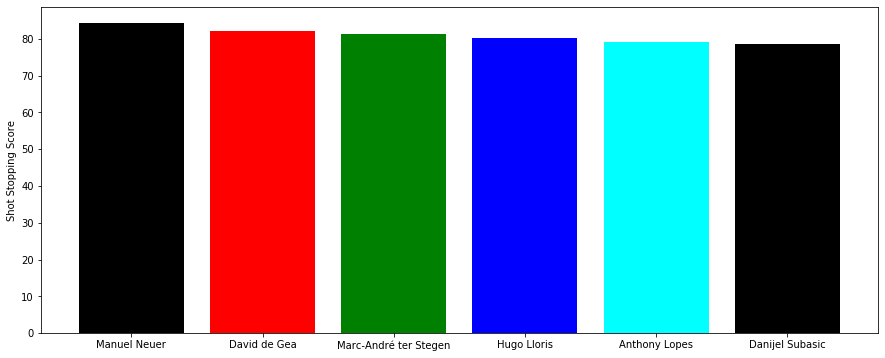

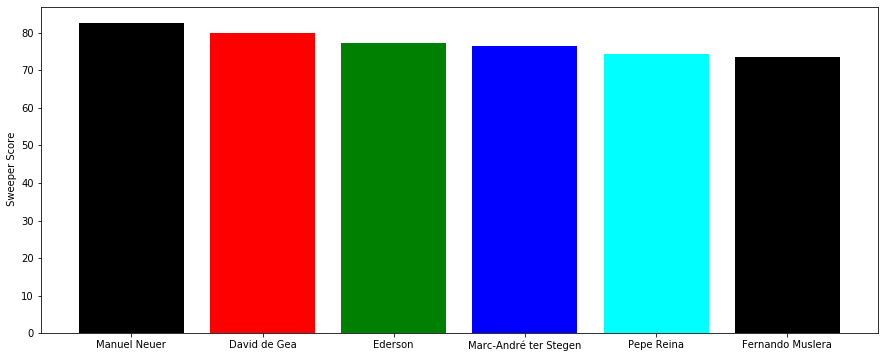

In [14]:
plt.figure(figsize=(15,6))
 
# Generate sequential data and plot
sd = df.sort_values('Gk Shot Stopper', ascending=False)[:6]
x1 = np.array(list(sd.index))
y1 = np.array(list(sd['Gk Shot Stopper']))
plt.bar(x1, y1,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.ylabel("Shot Stopping Score")
sd
plt.figure(figsize=(15,6))
 
# Generate sequential data and plot
sd1 = df.sort_values('GK Sweeper', ascending=False)[:6]
x1 = np.array(list(sd1.index))
y1 = np.array(list(sd1['GK Sweeper']))
plt.bar(x1, y1,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.ylabel(" Sweeper Score")
sd1

In [15]:

df['DF CentreBacks'] = (d*df['Reactions'] + c*df['Interceptions'] + d*df['Slide Tackle'] + d*df['Stand Tackle'] + b*df['Vision'] + b*df['Composure'] + b*df['Crossing'] +a*df['Short Pass'] + b*df['Long Pass'] + c*df['Acceleration'] + b*df['Sprint Speed']+ d*df['Stamina'] + d*df['Jumping'] + d*df['Heading'] + b*df['Long Shots'] + d*df['Marking'] + c*df['Aggression'])/(6*b + 3*c + 7*d)

df['DF WingBacks'] = (b*df['Ball Control'] + a*df['Dribbling'] + a*df['Marking'] + d*df['Slide Tackle'] + d*df['Stand Tackle'] + a*df['Att. Position'] + c*df['Vision'] + c*df['Crossing'] + b*df['Short Pass'] + c*df['Long Pass'] + d*df['Acceleration'] +d*df['Sprint Speed'] + c*df['Stamina'] + a*df['Finishing'])/(4*a + 2*b + 4*c + 4*d)
df.head()

,Country,Height,Weight,Preferred Foot,Birth Date,Age,Preferred Positions,Value,Value,Value,...,Volleys,GK Positioning,GK Diving,GK Handling,GK Kicking,GK Reflexes,Gk Shot Stopper,GK Sweeper,DF CentreBacks,DF WingBacks
Name,Uruguay,181,78,Left,"Feb. 17, 1992",26,RM/CAM,€575.000,$625.000,£500.000,...,55,12,7,11,7,14,27,32.4903,54.6489,61.7917
Nahuel Guzmán,Argentina,193,90,Right,"Feb. 10, 1986",32,GK,€6.500.000,$7.000.000,£5.500.000,...,12,79,77,76,67,80,70.516,66.4008,35.3943,33.753
Franco Armani,Argentina,189,88,Right,"Oct. 16, 1986",31,GK,€6.500.000,$7.000.000,£5.500.000,...,15,78,78,73,69,81,68.9734,64.2023,31.5606,26.7292
Gabriel Mercado,Argentina,180,83,Right,"March 18, 1987",31,RB/CB,€9.500.000,$11.000.000,£8.500.000,...,36,12,12,16,10,6,37.484,38.2101,75.6735,72.5863
Nicolás Tagliafico,Argentina,172,67,Left,"Aug. 31, 1992",26,CB/LB,€13.000.000,$14.500.000,£11.500.000,...,38,15,13,9,10,16,40.4681,41.8949,77.6242,77.8482


,Country,Height,Weight,Preferred Foot,Birth Date,Age,Preferred Positions,Value,Value,Value,...,Volleys,GK Positioning,GK Diving,GK Handling,GK Kicking,GK Reflexes,Gk Shot Stopper,GK Sweeper,DF CentreBacks,DF WingBacks
Danny Rose,England,174,76,Left,"July 2, 1990",28,LB/LWB/LW,€15.000.000,$16.500.000,£13.000.000,...,64,13,10,11,8,13,39.2287,41.1946,78.6283,78.0238
Benjamin Mendy,France,185,85,Left,"July 17, 1994",24,LB/LWB/LW,€15.500.000,$17.000.000,£13.500.000,...,20,15,7,7,9,9,36.4309,38.7782,75.46,76.8214
Ashley Young,England,175,65,Right,"July 9, 1985",33,RB/LB/LWB/LW,€8.000.000,$9.000.000,£7.000.000,...,73,16,16,10,15,15,37.0319,41.6109,73.1704,76.3869
Martin Olsson,Sweden,178,81,Left,"May 17, 1988",30,LB/LWB/LW,€5.000.000,$5.500.000,£4.400.000,...,65,9,11,9,7,12,37,38.7899,73.846,74.2054
Johan Mojica,Colombia,185,73,Left,"Aug. 21, 1992",26,LB/LWB/LM/LW,€5.000.000,$5.500.000,£4.400.000,...,43,9,13,8,14,15,35.8723,38.7899,69.3265,74.119
Steven Zuber,Switzerland,182,79,Right,"Aug. 17, 1991",27,LB/LWB/LM/LW,€7.500.000,$8.500.000,£6.500.000,...,57,14,15,15,7,9,37.2447,39.4669,73.232,73.3601


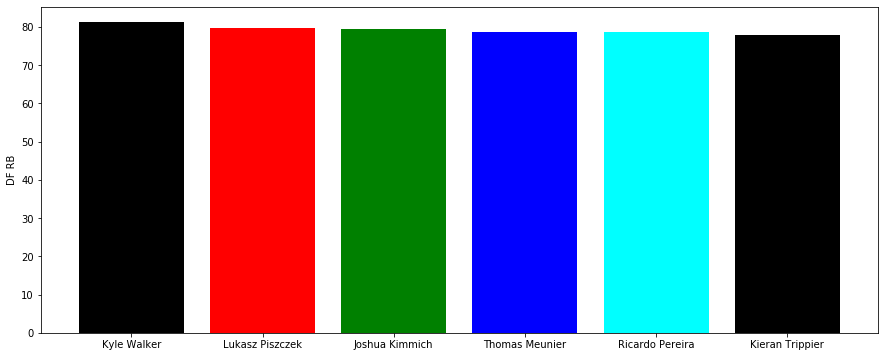

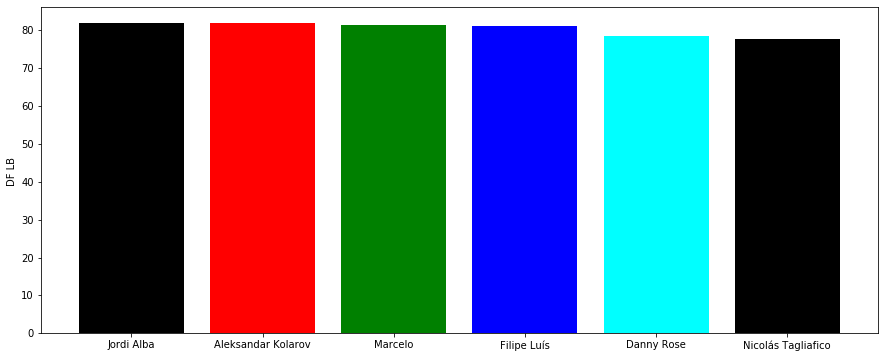

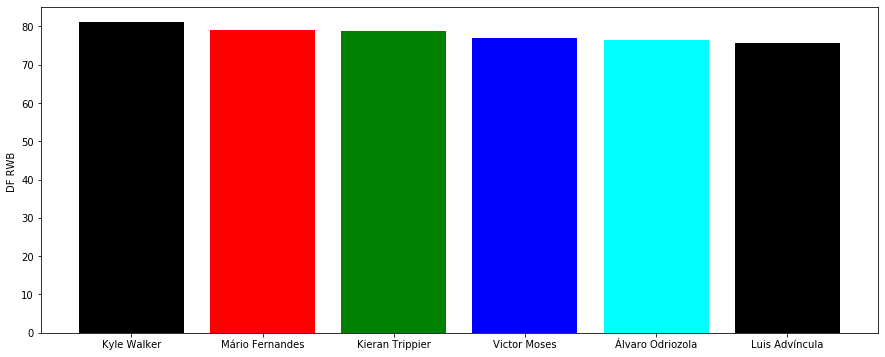

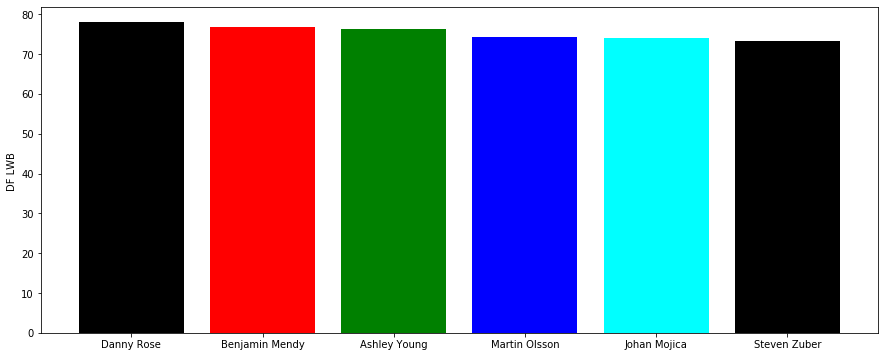

In [16]:
plt.figure(figsize=(15,6))
 
# Generate sequential data and plot
sd = df[df['Preferred Positions'].str.contains("RB")].sort_values('DF CentreBacks', ascending=False)[:6]
x1 = np.array(list(sd.index))
y1 = np.array(list(sd['DF CentreBacks']))
plt.bar(x1, y1,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.ylabel("DF RB")
plt.figure(figsize=(15,6))
# print(sd)
# sd
sd

# Generate sequential data and plot
sd = df[df['Preferred Positions'].str.contains("LB")].sort_values('DF CentreBacks', ascending=False)[:6]
x1 = np.array(list(sd.index))
y1 = np.array(list(sd['DF CentreBacks']))
plt.bar(x1, y1,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.ylabel("DF LB ")
plt.figure(figsize=(15,6))
# print(sd) 
# sd
#Generate sequential data and plot
sd = df[df['Preferred Positions'].str.contains("RWB")].sort_values('DF WingBacks', ascending=False)[:6]
x1 = np.array(list(sd.index))
y1 = np.array(list(sd['DF WingBacks']))
plt.bar(x1, y1,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.ylabel("DF RWB ")
plt.figure(figsize=(15,6))
# print(sd)
# sd
# Generate sequential data and plot
sd = df[df['Preferred Positions'].str.contains("LWB")].sort_values('DF WingBacks', ascending=False)[:6]
x1 = np.array(list(sd.index))
y1 = np.array(list(sd['DF WingBacks']))
plt.bar(x1, y1,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.ylabel("DF LWB ")
# print(sd)
# sd

sd

In [17]:
df['MF Playmaker'] = (d*df['Ball Control'] + d*df['Dribbling'] + a*df['Marking'] + d*df['Reactions'] + d*df['Vision'] + c*df['Att. Position'] + c*df['Crossing'] + d*df['Short Pass'] + c*df['Long Pass'] + c*df['Curve'] + b*df['Long Shots'] + c*df['FK Acc.'])/(1*a + 1*b + 4*c + 4*d)

df['MF Beast'] = (d*df['Agility'] + c*df['Balance'] + b*df['Jumping'] + c*df['Strength'] + d*df['Stamina'] + a*df['Sprint Speed'] + c*df['Acceleration'] + d*df['Short Pass'] + c*df['Aggression'] + d*df['Reactions'] + b*df['Marking'] + b*df['Stand Tackle'] + b*df['Slide Tackle'] + b*df['Interceptions'])/(1*a + 5*b + 4*c + 4*d)

df['MF Controller'] = (d*df['Ball Control'] + a*df['Dribbling'] + a*df['Marking'] + a*df['Reactions'] + c*df['Vision'] + c*df['Composure'] + d*df['Short Pass'] + d*df['Long Pass'])/(2*c + 3*d + 4*a)

In [18]:
sd = df[df['Preferred Positions'].str.contains("CAM")].sort_values('MF Playmaker', ascending=False)[:6]
sd

,Country,Height,Weight,Preferred Foot,Birth Date,Age,Preferred Positions,Value,Value,Value,...,GK Handling,GK Kicking,GK Reflexes,Gk Shot Stopper,GK Sweeper,DF CentreBacks,DF WingBacks,MF Playmaker,MF Beast,MF Controller
Kevin De Bruyne,Belgium,181,68,Right,"June 28, 1991",27,CM/CAM,€104.500.000,$117.000.000,£92.000.000,...,13,5,13,40.2394,44.2724,71.5277,77.4583,107.897,75.294,85.6667
Christian Eriksen,Denmark,182,76,Right,"Feb. 14, 1992",26,RM/CM/CAM,€74.500.000,$83.500.000,£65.500.000,...,14,7,6,35.2713,41.4397,65.5873,72.8601,106.003,69.3648,84.7374
Paulo Dybala,Argentina,177,75,Left,"Nov. 15, 1993",24,CAM/ST,€89.000.000,$100.000.000,£78.500.000,...,4,4,8,36.8351,41.2607,61.2875,68.1667,104.993,67.5433,81.2121
James Rodríguez,Colombia,180,75,Left,"July 12, 1991",27,RM/CM/CAM,€63.000.000,$70.500.000,£55.500.000,...,15,15,14,37.7713,43.4708,64.5092,69.8929,104.392,67.9423,82.096
Thiago,Spain,174,70,Right,"April 11, 1991",27,CDM/CM/CAM,€68.500.000,$77.000.000,£60.500.000,...,11,7,13,38.5319,42.4864,71.9754,75.8393,104.346,75.2756,85.5354
David Silva,Spain,173,67,Left,"Jan. 8, 1986",32,CM/CAM,€58.500.000,$65.500.000,£51.500.000,...,1,1,1,32.8085,38.3735,63.4435,69.8423,104.143,69.7454,85.4545


,Country,Height,Weight,Preferred Foot,Birth Date,Age,Preferred Positions,Value,Value,Value,...,GK Handling,GK Kicking,GK Reflexes,Gk Shot Stopper,GK Sweeper,DF CentreBacks,DF WingBacks,MF Playmaker,MF Beast,MF Controller
Andrés Iniesta,Spain,171,68,Right,"May 11, 1984",34,CM/LM,€29.500.000,$33.000.000,£26.000.000,...,13,6,7,34.6117,41.3074,66.4189,72.3601,104.777,69.2651,87.6869
Koke,Spain,177,73,Right,"Jan. 8, 1992",26,RM/CM/LM,€47.500.000,$53.500.000,£42.000.000,...,12,5,13,37.4468,41.5409,72.4209,75.6339,102.651,74.8583,81.7475
Philippe Coutinho,Brazil,172,68,Right,"June 12, 1992",26,RM/CM/LM/LW,€63.000.000,$70.500.000,£55.500.000,...,7,9,6,36.0053,41.6265,62.6016,72.2857,103.415,69.6824,81.6566
Saúl Ñíguez,Spain,184,76,Left,"Nov. 21, 1994",23,RM/CM/LM,€43.000.000,$48.500.000,£38.000.000,...,13,12,9,39.1436,42.6615,78.9815,78.4762,96.0532,77.6588,80.7677
Julian Draxler,Germany,187,77,Right,"Sept. 20, 1993",24,CM/LM/CAM/LW,€39.500.000,$44.500.000,£35.000.000,...,13,5,8,39.0851,42.2607,67.3552,72.2798,100.601,68.7139,79.9495
Marco Reus,Germany,180,75,Right,"May 31, 1989",29,LM/CAM/ST/LW,€39.000.000,$44.000.000,£34.500.000,...,12,13,11,39.8457,44.9183,63.768,71.2649,102.814,68.7848,79.702


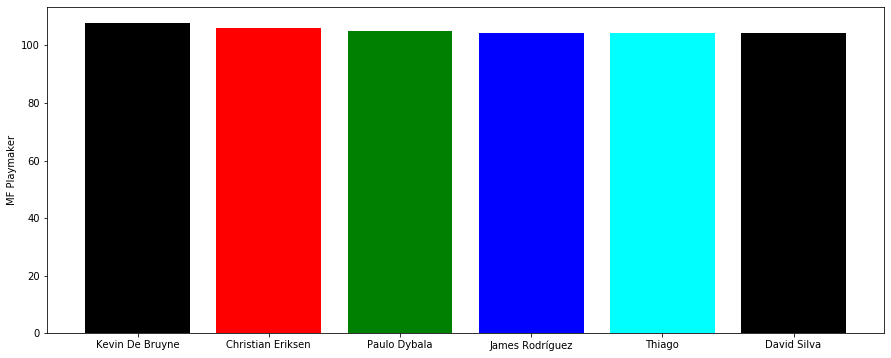

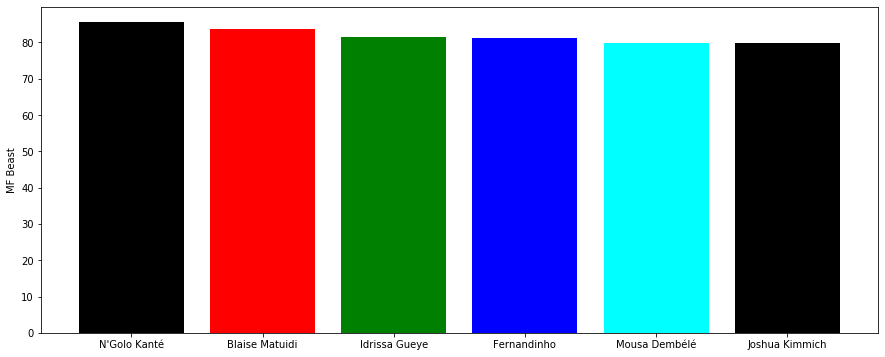

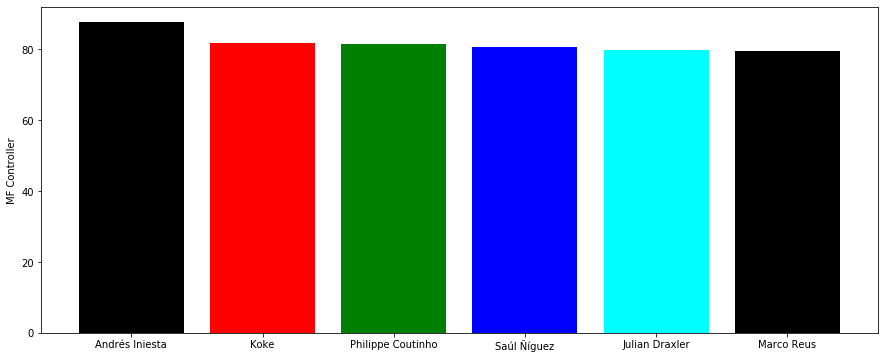

In [19]:

plt.figure(figsize=(15,6))
 
# Generate sequential data and plot
sd = df[df['Preferred Positions'].str.contains("CAM")].sort_values('MF Playmaker', ascending=False)[:6]

x1 = np.array(list(sd.index))
y1 = np.array(list(sd['MF Playmaker']))
plt.bar(x1, y1,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.ylabel("MF Playmaker")

plt.figure(figsize=(15,6))
 
# Generate sequential data and plot
sd = df[df['Preferred Positions'].str.contains("CDM")].sort_values('MF Beast', ascending=False)[:6]
x1 = np.array(list(sd.index))
y1 = np.array(list(sd['MF Beast']))
plt.bar(x1, y1,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.ylabel("MF Beast")
plt.figure(figsize=(15,6))
 
# Generate sequential data and plot
sd = df[df['Preferred Positions'].str.contains('LM')].sort_values('MF Controller', ascending=False)[:6]
x1 = np.array(list(sd.index))
y1 = np.array(list(sd['MF Controller']))
plt.bar(x1, y1,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.ylabel("MF Controller")
sd

In [20]:

df['Attacking Left Wing'] = (c*df['Ball Control'] + c*df['Dribbling'] + c*df['Sprint Speed'] + d*df['Acceleration'] + b*df['Vision'] + c*df['Crossing'] + b*df['Short Pass'] + b*df['Long Pass'] + b*df['Aggression'] + b*df['Agility'] + a*df['Curve'] + c*df['Long Shots'] + b*df['FK Acc.'] + d*df['Finishing'])/(a + 6*b + 5*c + 2*d)
df['Attacking Right Wing'] = (c*df['Ball Control'] + c*df['Dribbling'] + c*df['Sprint Speed'] + d*df['Acceleration'] + b*df['Vision'] + c*df['Crossing'] + b*df['Short Pass'] + b*df['Long Pass'] + b*df['Aggression'] + b*df['Agility'] + a*df['Curve'] + c*df['Long Shots'] + b*df['FK Acc.'] + d*df['Finishing'])/(a + 6*b + 5*c + 2*d)
df['Striker'] = (b*df['Ball Control'] + a*df['Vision'] + b*df['Aggression'] + b*df['Agility'] + a*df['Curve'] + a*df['Long Shots'] + d*df['Balance'] + d*df['Finishing'] + d*df['Heading'] + c*df['Jumping'] + c*df['Dribbling'])/(3*a + 3*b + 2*c + 3*d)

,Country,Height,Weight,Preferred Foot,Birth Date,Age,Preferred Positions,Value,Value,Value,...,Gk Shot Stopper,GK Sweeper,DF CentreBacks,DF WingBacks,MF Playmaker,MF Beast,MF Controller,Attacking Left Wing,Attacking Right Wing,Striker
Lionel Messi,Argentina,170,72,Left,"June 24, 1987",31,CF/RW/ST,€118.500.000,$133.000.000,£104.500.000,...,39.9309,46.7043,62.8706,71.5208,110.551,68.0341,87.6061,87.9286,87.9286,83.8972
Antoine Griezmann,France,175,71,Left,"March 21, 1991",27,RW/ST/LW,€71.000.000,$79.500.000,£62.500.000,...,43.5053,45.965,67.6468,68.8036,101.14,70.6824,78.0404,82.9343,82.9343,84.2727
Mohamed Salah,Egypt,175,71,Left,"June 15, 1992",26,RW,€63.000.000,$70.500.000,£55.500.000,...,41.9202,45.2257,68.2916,73.7173,99.0033,74.4724,78.303,82.5514,82.5514,78.9209
Douglas Costa,Brazil,172,70,Left,"Sept. 14, 1990",27,LM/RW/LW,€33.500.000,$37.500.000,£29.500.000,...,37.0266,41.7198,61.4846,70.1548,98.495,69.1995,76.3889,81.1743,81.1743,73.6719
Marco Asensio,Spain,182,76,Left,"Jan. 21, 1996",22,CAM/RW/LW,€46.000.000,$51.500.000,£40.500.000,...,36.2979,41.4241,62.2485,71.6488,100.12,65.5722,80.2172,80.9771,80.9771,70.8182
Ángel Di María,Argentina,180,69,Left,"Feb. 14, 1988",30,RW/LW,€30.500.000,$34.500.000,£27.000.000,...,38.1277,42.856,67.5216,75.369,98.392,71.7375,78.3939,80.8143,80.8143,74.1225


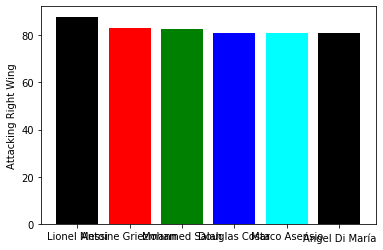

<Figure size 1080x432 with 0 Axes>

In [21]:
# Generate sequential data and plot
sd = df[df['Preferred Positions'].str.contains("RW")].sort_values('Attacking Right Wing', ascending=False)[:6]
x1 = np.array(list(sd.index))
y1 = np.array(list(sd['Attacking Right Wing']))
plt.bar(x1, y1,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.ylabel("Attacking Right Wing")
plt.figure(figsize=(15,6))
# print(sd)
sd

                    Country Height Weight Preferred Foot      Birth Date Age  \
Cristiano Ronaldo  Portugal    187     83          Right    Feb. 5, 1985  33   
Eden Hazard         Belgium    173     76          Right    Jan. 7, 1991  27   
Neymar               Brazil    175     68          Right    Feb. 5, 1992  26   
Antoine Griezmann    France    175     71           Left  March 21, 1991  27   
Marco Reus          Germany    180     75          Right    May 31, 1989  29   
Philippe Coutinho    Brazil    172     68          Right   June 12, 1992  26   

                  Preferred Positions         Value         Value  \
Cristiano Ronaldo               ST/LW   €95.500.000  $107.000.000   
Eden Hazard                     CF/LW   €95.500.000  $107.000.000   
Neymar                             LW  €119.500.000  $133.500.000   
Antoine Griezmann            RW/ST/LW   €71.000.000   $79.500.000   
Marco Reus               LM/CAM/ST/LW   €39.000.000   $44.000.000   
Philippe Coutinho        

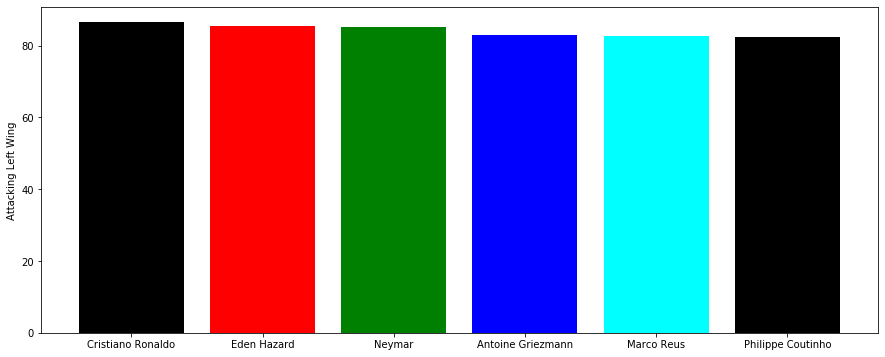

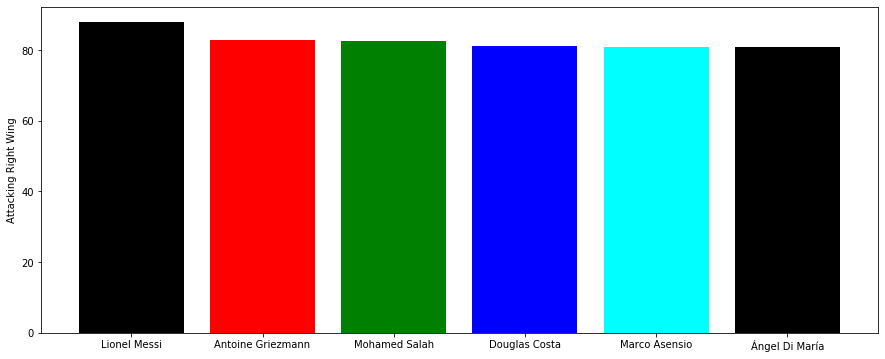

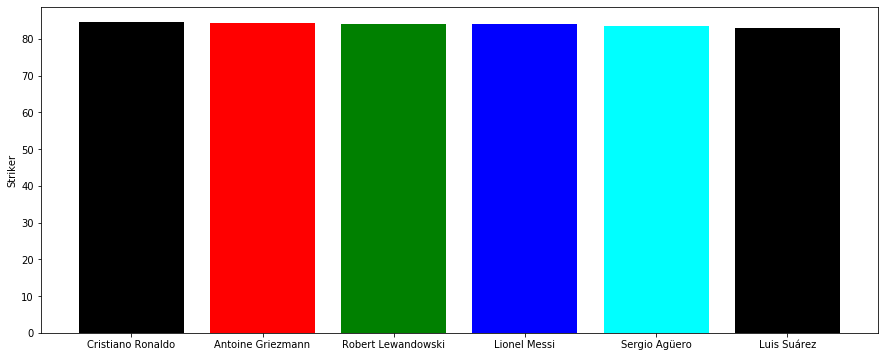

In [22]:
plt.figure(figsize=(15,6))
 
# Generate sequential data and plot
sd = df[df['Preferred Positions'].str.contains("LW")].sort_values('Attacking Left Wing', ascending=False)[:6]
x1 = np.array(list(sd.index))
y1 = np.array(list(sd['Attacking Left Wing']))
plt.bar(x1, y1,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.ylabel("Attacking Left Wing")
plt.figure(figsize=(15,6))
print(sd)
 
# Generate sequential data and plot
sd = df[df['Preferred Positions'].str.contains("RW")].sort_values('Attacking Right Wing', ascending=False)[:6]
x1 = np.array(list(sd.index))
y1 = np.array(list(sd['Attacking Right Wing']))
plt.bar(x1, y1,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.ylabel("Attacking Right Wing")
plt.figure(figsize=(15,6))
print(sd)
 
# Generate sequential data and plot
sd = df[df['Preferred Positions'].str.contains('ST')].sort_values('Striker', ascending=False)[:6]
x1 = np.array(list(sd.index))
y1 = np.array(list(sd['Striker']))
plt.bar(x1, y1,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.ylabel("Striker")
print(sd)